<a href="https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/week3/EDA_and_Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Week 3
# EDA and Data visualization

This notebooks introduces to Exploratory Data Analysis and visualization, mainly using the pandas library.

### Table of Contents
#### 1. Basic Example: Creating a DataFrame from Scratch
#### 2. Restaurant inspection results in NYC
* 2.1 Reading a CSV file
* 2.2 Descriptive statistics
* 2.3 Descriptive Statistics for Numeric Variables
* 2.4 Converting Dates
* 2.5 Categorical Variables
* 2.6 Analyzing the content of the columns
* 2.7 Selecting a subset of the columns
* 2.8 Selecting rows
* 2.9 Pivot Tables
* 2.10 (Optional, FYI) Advanced Pivot Tables
* 2.11 Exercises

#### 3. NYPD Vehicle Collisions
* 3.1 Introduction to the dataset
* 3.2 Plots, graphs and pivot tables
* 3.3 2d histograms, density plots, and contour plots
* 3.4 Combining plots
* 3.5 Bonus plots

## Setup and preliminaries

In [1]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Import requiered packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

We type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [3]:
# Make the graphs a bit bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

## 1. Basic Example: Creating a DataFrame from Scratch

This is an example of creating a dataframe by passing a list of dictionaries.

In [ ]:
df = pd.DataFrame([ 
    {"First Name": "Michalis", "Last Name":" Vlachos"},
    {"First Name": "John", "Last Name":" Doe"},
    {"Last Name":"Trump"}
])
df

## 2. Restaurant inspection results in NYC

### 2.1 Reading a CSV file
We can directly load csv file from the url with pandas.

In [ ]:
url = 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD'
restaurants = pd.read_csv(url, 
                          encoding='utf_8', 
                          dtype = 'unicode',
                          parse_dates = True,
                          infer_datetime_format = True,
                          low_memory=False)

# Let's take a look at the first 5 rows of the dataframe
restaurants.head(5)

Alternatively, we can first download it and then load it from a local directory in our computer (in case we are not using colab). The `pd.read_csv` method has many options, and you can further read in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### 2.2 Descriptive statistics

We can use the method `describe()` to get a quick overview of the data in the DataFrame.

In [ ]:
restaurants.describe()

We can also check the data types for each column using `dtypes`.

In [ ]:
restaurants.dtypes
# also try: restaurants.info()

The `object` type is a string. For some of them, we would like to change the data types using the `pd.to_numeric` and `pd.to_datetime` functions. We examine how to convert data types in the next subsection.

### 2.3 Descriptive Statistics for Numeric Variables


#### 2.3.1 Converting Data Types to Numeric

The `object` type is a string. When we want to convert an object to numeric, we can use the `pd.to_numeric` function, as shown below:

In [ ]:
restaurants[["SCORE"]].head()

In [ ]:
# convert score to numeric
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

#### 2.3.2 Basic descriptive statistics for numeric variables

And now that SCORE is a numeric variable, we can get more detailed descriptive statistics for the variable using the `.describe()` command:

In [ ]:
# For column names without a space, we can also access directly the column as follows:
restaurants.SCORE.describe()

#### 2.3.3 A first histogram
And now that SCORE is a numeric variable, we can examine its distribution by using the `hist` command of Pandas, which creates a histogram. (The histogram is also available as `plot.hist()`, or `plot(kind='hist')`).

In [ ]:
restaurants["SCORE"].hist()
# restaurants["SCORE"].plot(kind='hist')

By default, the histogram has ~10 bars. We can change the resolution of the histogram using the `bins` attribute. Larger numbers of `bins` allow for higher resolution, but if we increase the number too much, many bins end up having very few, or no data points. For example, experiment with changing the number of bins below, and change the value from 50 to something greater.

In [ ]:
restaurants["SCORE"].hist(bins=50) # try with e.g. bins=200

In [ ]:
# A quick exposure to various options of the "hist" command
restaurants.SCORE.hist(bins=50, # use 50 bars
                          range=(0,50), # x-axis from 0 to 50
                          density=False,  # show normalized count (density=True), or raw counts (density= False)
                          figsize=(15,5), # controls the size of the plot
                          alpha=0.8, # make the plot 20% transparent
                          color='green' # change color
                         )

#### 2.3.4 Kernel Density Estimation (KDE)

An alternative to histograms is to use the **kernel density**, which estimates a continuous function, instead of the bucketized counts, which tends to be discontinuous and bumpy. We can access this usind the `.plot(kind='kde')` command:

In [ ]:
# This plots the density of a numeric attribute
# kde = kernel density estimation
restaurants.SCORE.plot(
    kind='kde', 
    color='Black', 
    xlim=(0,50), 
    figsize=(15,5)
)

### 2.4 Converting Dates

Now let's convert the dates columns into the appropriate data types. Let's take a look at a few dates.

In [ ]:
restaurants["GRADE DATE"].sample(10) # 10 random dates

To this end, we first need to understand how to [parse dates using the Python conventions](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

The relevant entries from the table are:
* `%m` Month as a zero-padded decimal number.
* `%d` 	Day of the month as a zero-padded decimal number.
* `%Y` Year with century as a decimal number.

Now, we can specify how to parse the dates. (In principle, we can let Pandas do this automatically, but it is _much_ faster if we specify it ourselves. It is also much less error-prone).

In [16]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [ ]:
restaurants.dtypes

In [ ]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

#### Dates: exercise

* Plot a histogram for `INSPECTION DATE`, `GRADE DATE`, `RECORD DATE`. What do you see?
* Try modifying the `bins` parameter. What are the results?
* The `range=(start, finish)` command is often useful, when we want to focus on a particular part of the dataset. Try using that for  `INSPECTION DATE` to limit the dates to be between 1/1/2014 and 05/31/2018.

In [ ]:
# Not very appealing
restaurants['INSPECTION DATE'].hist()

In [ ]:
restaurants['GRADE DATE'].hist()

In [ ]:
restaurants['INSPECTION DATE'].hist(
    range = ('1/1/2014','9/30/2018'), # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins = 57, # number of months in the range -- computed manually
    figsize = (15,5) # resize 15-width, 5-height
)

In [ ]:
restaurants['GRADE DATE'].hist(
    range = ('1/1/2014','9/30/2018'), # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins = 57, # number of months in the range -- computed manually
    figsize = (15,5) # resize 15-width, 5-height
)

### 2.5 Categorical Variables

This is less important, but sometimes we want to specify variables to be "Categorical". This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).

In [ ]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

### 2.6 Analyzing the content of the columns

We can also get quick statistics about the common values that appear in each column:

In [ ]:
restaurants["DBA"].value_counts()[:10]

In [ ]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5]

And we can use the "plot" command to plot the resulting histogram (more detail at http://pandas.pydata.org/pandas-docs/stable/visualization.html).

In [ ]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5].plot(kind='bar')

In [ ]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular

Hm, that does not look nice. Let's shorten the name of the cuisine for the _"Latin (Cuban, Dominican, Puerto Rican, South & Central American)"_ and replace it with _"Latin American"_. We will use the `replace` command in Pandas:

In [28]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
    value = 'Latin American',
    inplace=True
)

In [29]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='CafÃ©/Coffee/Tea',
    value = 'Cafe/Coffee/Tea',
    inplace=True
)

In [ ]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:5].plot(kind='bar')

Let's do the similar histogram for the violation codes.

In [ ]:
restaurants["VIOLATION CODE"].head(5)

In [ ]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

In [ ]:
violation_counts[0:20].plot(kind='bar')

#### Plot: Exercise

* Create a plot showing the number of inspections that happen across **boroughs**. Use the `BORO` column and the `value_counts()` function.

In [ ]:
restaurants['BORO'].value_counts()

In [ ]:
# Same as above; works only for attribute names without spaces
restaurants.BORO.value_counts()

In [ ]:
restaurants['BORO'].value_counts().plot(kind='bar')

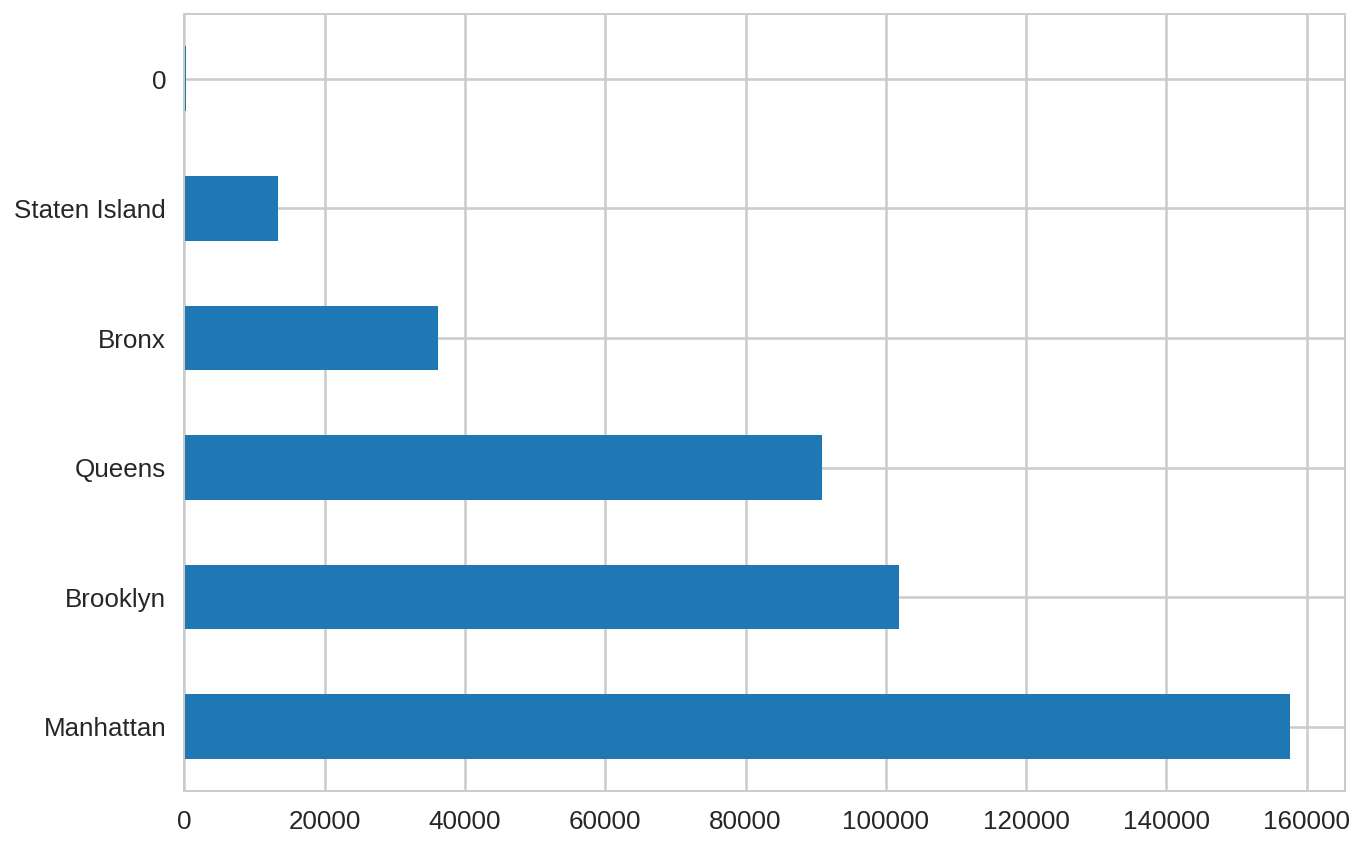

In [37]:
restaurants['BORO'].value_counts().plot(kind='barh')

### 2.7 Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [ ]:
restaurants[ ["DBA", "GRADE", "GRADE DATE"] ].head()

In [ ]:
columns = ["GRADE DATE", "VIOLATION CODE", "DBA", "SCORE"]
restaurants[ columns ].head()

### 2.8 Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep.

In [ ]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice.head()

In [ ]:
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called has_mice
has_mice = restaurants[mice]
has_mice.head()

In [ ]:
# List the most frequent DBA values in the data of restaurants that have mice
has_mice["DBA"].value_counts()[:20]

In [ ]:
has_mice["CAMIS"].value_counts()[:5]

In [ ]:
condition = (has_mice["CAMIS"] == '41259444')
has_mice[condition].head()

And we can use more complex conditions. 

In [45]:
mice_Brooklyn =  ( (restaurants["VIOLATION CODE"] == "04L") 
                    & (restaurants["BORO"] == "Brooklyn") )

In [ ]:
has_mice_brooklyn = restaurants[mice_Brooklyn]
has_mice_brooklyn.head()

In [ ]:
has_mice_brooklyn["DBA"].value_counts()[:20]

### 2.9 Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) is one of the most commonly used exploratory tools, and in Pandas they are extremely flexible. 

For example, let's try to count the number of restaurants that are inspected every day. 

In [48]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'CAMIS',  # specifies the content of the cells
    aggfunc = 'count' # we ask to count how many different CAMIS values we see
)

In [ ]:
pivot.head(20)

Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

In [ ]:
pivot.plot()

#### 2.9.1 Deleting rows from a table

Hm, that '1900-01-01' line is messing things up. Let's delete it, using the `drop` command. Notice a few things:
* We use the `pd.to_datetime` command to convert the '1900-01-01' string into a datetime data type.
* We use the `axis='index'` parameter means that we delete a **row** with that index value. (The `axis='columns'` means that we delete a column.). Often you will see `axis=0` (equivalent to `axis='index'`) and `axis=1` (equivalent to `axis='columns'`).
* The `inplace=True` means that we change directly the dataframe, instead of returning a new dataframe that does not have the deleted value.

In [51]:
pivot.drop(pd.to_datetime('1900-01-01'), axis='index', inplace=True)

In [ ]:
pivot.head(5)

And let's plot again.

In [ ]:
pivot.plot(figsize=(10,5))

In [ ]:
pivot.tail(50).plot()

#### 2.9.2 Changing date granularity 

We can also use the [resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) command to change the frequency from one day, to, say, 7 days. Then we can compute, say, the average (`mean()`) for these days, or the total number (`sum()`) of inspections.

In [ ]:
pivot.resample('1W').mean().tail(10)

Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

In [ ]:
# Plot the average number of inspections, over 7-day periods
pivot.resample('7D').mean().plot()

In [ ]:
# Plot the total number of inspections, over 1-month periods
pivot.resample('1M').sum().plot()

In [ ]:
plot = pivot.resample('7D').mean().plot()
plot.set_xlabel("Date of Inspection")
plot.set_ylabel("Average Number of Inspections (7-day average)")
plot.set_title("Analysis of Number of Inspections over Time")

#### 2.9.3 Pivot Table with two (or more) variables)

We would like to break down the results by **borough**, so we add the `column` parameter.

In [ ]:
pivot2 = pd.pivot_table(
    data = restaurants,
    index = 'INSPECTION DATE', 
    columns = 'BORO', 
    values = 'CAMIS', 
    aggfunc = 'count'
)
pivot2.head(10)

###### Deleting rows and columns

Now, you will notice that there are a few columns and rows that are just noise. The first row with date *'1900-01-01'* is clearly noise. We can use the `drop` command of Pandas to drop these.

In [60]:
# The axis='index' (or axis=0) means that we delete a row with that index value
pivot2 = pivot2.drop(pd.to_datetime('1900-01-01'), axis='index') 

In [ ]:
pivot2.tail(5)

In [ ]:
# We resample the index, to keep only dates every one month
# For that one month period, we compute the average value
pivot2.resample('1M').mean().tail(10)

If we plot a dataframe then by default the index column in our case the INSPECTION DATE becomes the x-asis and all the columns become separate lines in the plot.

In [ ]:
pivot2.resample('1M').mean().plot(figsize=(10,5))

# Potential Exercise, if we have time: 
# Drop the last date, which corresponds to an incomplete month

### 2.10 (Optional, FYI) Advanced Pivot Tables

We can also add multiple attributes in the index and columns. It is also possible to have multiple aggregation functions, and we can even define our own aggregation functions.

In [ ]:
# We write a function that returns the 
# number of unique items in a list x 
def count_unique(x):
    return len(set(x))

# We break down by BORO and GRADE, and also calculate 
# inspections in unique (unique restaurants) 
# and non-unique entries (effectuvely, violations)
pivot_advanced = pd.pivot_table(
    data = restaurants,
    index = 'GRADE DATE', 
    columns = ['BORO', 'GRADE'],
    values = 'CAMIS', 
    aggfunc = ['count', count_unique]
)

# Take the total number of inspections (unique and non-unique)
agg = pivot_advanced.resample('1M').sum()

# Show the last 5 entries and show the transpose (.T) 
agg.tail().T

### 2.11 Exercises

#### Exercise 1 

Now let's do the same exercise, but instead of counting the number of inspections, we want to compute the average score assigned by the inspectors. Hint: We will need to change the `values` and the `aggfunc` parameters in the `pivot_table` function above.

In [65]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'SCORE',  # specifies the content of the cells
    aggfunc = 'mean' # compute the average SCORE
)

In [ ]:
pivot.plot(figsize=(10,4))

In [ ]:
pivot.resample('1M').mean().tail(10)

#### Exercise 2

We now want to examine if different cuisines have different inspection scores. Compute the average inspection score by cuisine. Use the `sort_values()` command ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)) to order cuisines by their inspection scores.

In [ ]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # dates are the rows
    columns = 'CUISINE DESCRIPTION', # cuisines are the columns
    values = 'SCORE',  # we analyze the SCORE
    aggfunc = 'mean' # compute the average SCORE
)
# Select 3 columns (american, frenchn, chinese), compute the average score for a month
# and plot the results
pivot[ ["American", "French", "Chinese"] ].resample('1M').mean().plot(figsize=(10,4))
plt.ylabel("score");

## 3. NYPD Vehicle Collisions

So farm we interacted with the NYC Restaurant Inspection Data. Now, let's download another dataset, and do some analysis. We will focus on the [NYPD Vehicle Collisions](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data) data set.


### 3.1 Introduction to the dataset
Load the accidents dataset from url 


In [69]:
df = pd.read_csv('https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD', low_memory=False)

In [ ]:
df.head()

Or we can first download it and then load it with pandas

In [71]:
# !curl 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' -o data/accidents.csv

In [72]:
# df = pd.read_csv("data/accidents.csv", low_memory=False)

In [ ]:
len(df)

### 3.2 Plots, graphs and pivot tables

Find out the most common contributing factors to the collisions. 
 

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(11)

Now let's plot a histogram of the above list. Note that we skip the first element.

In [ ]:
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[1:11].plot(kind='barh')

Break down the number of collisions by borough.

In [ ]:
df.BOROUGH.value_counts().plot(kind='barh')

Find out how many collisions had 0 person injured, 1 person injured, etc. persons injured in each accident. Use the `value_counts()` approach. You may also find the `.plot(logy=True)` option useful when you create the plot to make the y-axis logarigthmic.
 

In [ ]:
plot = (
    df['NUMBER OF PERSONS INJURED'] # take the num of injuries column
    .value_counts() # compure the freuquency of each value
    .sort_index() # sort the results based on the index value instead of the frequency, 
                  # which is the default for value_counts
    .plot( # and plot the results
        kind='line', # we use a line plot because the x-axis is numeric/continuous
        marker='o',  # we use a marker to mark where we have data points 
        logy=True # make the y-axis logarithmic
    )
)
plot.set_xlabel("Number of injuries")
plot.set_ylabel("Number of collisions");

Break down the accidents by borough and contributing factor. Use the `pivot_table` function of Pandas
 

In [ ]:
pivot = pd.pivot_table(
    data = df,
    index = 'CONTRIBUTING FACTOR VEHICLE 1',
    columns = 'BOROUGH',
    aggfunc = 'count',
    values = 'COLLISION_ID'
)
pivot.head(10)

Find the dates with the most accidents. Can you figure out what happened on these days? 


In [ ]:
df["CRASH DATE"].value_counts().head(10)

Plot the number of accidents per day. (Hint: Ensure that your date column is in the right datatype and that it is properly sorted, before plotting)


In [80]:
df["CRASH DATE"] = pd.to_datetime(df["CRASH DATE"], format="%m/%d/%Y")

In [ ]:
(
    df["CRASH DATE"].value_counts() # count the number of accidents per day
    .sort_index() # sort the dates
    .resample('1M') # take periods of 1 month
    .sum() # sum the number of accidents per month
    .drop(pd.to_datetime('2019-04-30'), axis='index') # drop the current month
    .plot() # plot the result
);

Plot the accidents in map. Use a scatter plot using the `plot(kind='scatter', x=..., y=....)` command, and use the `LATITUDE` and `LONGITUDE` parameters. (Hint: **You will have to remove bad data points before getting into the right visual result**. To do this, specify a selection condition to limit the lat/long values to be values that are proper for the NYC region.)

In [ ]:
cleandf = df[(df.LONGITUDE<-50) & (df.LONGITUDE>-74.5) & (df.LATITUDE< 41)]

cleandf[ (df.LATITUDE>40) & (df.LATITUDE<41) & (df.LONGITUDE> -74.6) & (df.LONGITUDE<-50) ].plot(
    figsize = (20,15),
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 1, # make each dot to be very small 
    alpha = 0.05 # makes each point 95% transparent
)


Plot the accidents in map as above, but limit the data only to accidents with at least one injury.

In [ ]:
mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_df = cleandf[mask_injured]

injured_df.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 1, # make the size of the marker 1 pixel
    figsize = (20,15), # increase the size of the figure
    alpha = 0.05 # make each dot to be 95% transparent 
)

### 3.3 2d histograms, density plots, and contour plots
In the picture above, we can visually see that Manhattan, especially eastern midtown, and the area downtown near the entrance to the bridges, has a higher density. We can also derive histograms and density plots on 2-dimensions.

#### 3.3.1 Hexagonal bin plot
The hexbin plot created a 2-d histogram, where the color signals the number of points within a particular area. The `gridsize` parameter indicates the number of hexagones in the x direction. Higher values offer higher granularity, but very high values tend to create sparsity, when we do not have enough data points.

In [ ]:
# Hexbin plot
cleandf.plot(
    kind='hexbin',
    x='LONGITUDE',
    y='LATITUDE',
    gridsize=100,
    cmap=plt.cm.Blues,
    figsize=(10, 7))

#### 3.3.2 2d density  and contour plots
An alternative to the hexbin plots is to use density plots in two dimensions.

In [ ]:
# Basic 2D density plot
plt.subplots(figsize=(20, 15))

# We take a sample, because density plots take a long time to compute
# and a sample is typically as good as the full dataset
sample = cleandf.sample(10000)

sns.kdeplot(
    sample.LONGITUDE,
    sample.LATITUDE,
    gridsize=100,  # controls the resolution
    cmap=plt.cm.rainbow,  # color scheme
    shade= True, # whether to have a density plot (True), or just the contours (False)
    alpha=0.5,
    shade_lowest=False,
    n_levels=50  # How many contours/levels to have
)

In [ ]:
# Basic 2D contour plot
plt.subplots(figsize=(20, 15))

# We take a sample, because density plots take a long time to compute
# and a sample is typically as good as the full dataset
sample = cleandf.sample(10000)

sns.kdeplot(
    sample.LONGITUDE,
    sample.LATITUDE,
    gridsize=100,
    cmap=plt.cm.rainbow,
    shade=False,
    shade_lowest=False,
    n_levels=25)

### 3.4 Combining plots
So far, we examined how to create individual plots. We can even combine multiple plots together, using the ax parameter. So, let's say that we want to combine the scatter plots with the contour plot above:

In [ ]:
sample = cleandf.sample(10000)

scatterplot = cleandf.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(20, 15),
    s=0.5,
    alpha=0.1)

sns.kdeplot(
    sample.LONGITUDE,
    sample.LATITUDE,
    gridsize=100,
    cmap=plt.cm.rainbow,
    shade=False,
    shade_lowest=False,
    n_levels=20,
    alpha=1,
    ax=scatterplot)

### 3.5 Bonus plots

In [ ]:
# In the code below, we create three plots
# One with all the accidents (in black)
# One with all accidents that resulted in an injury (with orange)
# One with all the accidents with deaths (with red dots) 
# Then wen combine the  plots using the "ax" parameter

# We put conditions to keep only rows that 
# have reasonable values for LONGITUDE and LATITUDE
# The & character is the "AND" in Pandas
# the df.LATITUDE is equivalent to df['LATITUDE']
cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]


all_accidents_plot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    color = 'black',
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 0.5 # make the size of the market just 0.5 pixel
)

# We will keep only entries with at least one injury
# note that we cannot use the df.NUMBER OF PERSON INJURED notation
# because the attribute contains spaces.
mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_plot = cleandf[mask_injured].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.1, # makes the data points transparent (1 = opaque, 0 fully transparent)
    color = 'orange',
    ax = all_accidents_plot, # the ax parameter allows us to combine plots
    s = 1 # make the size of the market just 1 pixel
)

# we want only accidents with at least one death
mask_killed = cleandf['NUMBER OF PERSONS KILLED']>=1
cleandf[mask_killed].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.85, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 5, # make the size of the market 5 pixels, to be more visible
    color = 'red',
    ax = injured_plot # the ax parameter allows us to combine plots
)

In [ ]:
# Same as above, but with a 2-d density estimation for the location of
# accidents that resulted in at least one death

cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]


all_accidents_plot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    color = 'black',
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 0.5 # make the size of the market just 0.5 pixel
)

# We will keep only entries with at least one injury
# note that we cannot use the df.NUMBER OF PERSON INJURED notation
# because the attribute contains spaces.
mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_plot = cleandf[mask_injured].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.1, # makes the data points transparent (1 = opaque, 0 fully transparent)
    color = 'orange',
    ax = all_accidents_plot, # the ax parameter allows us to combine plots
    s = 1 # make the size of the market just 1 pixel
)

# we want only accidents with at least one death
mask_killed = cleandf['NUMBER OF PERSONS KILLED']>=1
killed_plot = cleandf[mask_killed].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.85, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 5, # make the size of the market 5 pixels, to be more visible
    color = 'red',
    ax = injured_plot # the ax parameter allows us to combine plots
)

sns.set_style("white")
mask = cleandf['NUMBER OF PERSONS KILLED']>=1
sample = cleandf[mask] # .sample(10000)

sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, gridsize=100,
            cmap=plt.cm.BuGn, shade=False, shade_lowest=True, n_levels=20, alpha=0.75, ax = killed_plot)